In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def sample_image(image, factor):
    """
    Downsamples the image by the given factor.
    Args:
        image (numpy array): Original image.
        factor (int): Factor by which to downsample.
    Returns:
        numpy array: Downsampled image.
    """
    height, width = image.shape[:2]
    sampled_image = cv2.resize(image, (width // factor, height // factor), interpolation=cv2.INTER_NEAREST)
    return sampled_image

In [3]:
def quantize_image(image, levels):
    """    Reduces the number of grayscale levels in the image.
    Args:
        image (numpy array): Original image.
        levels (int): Number of grayscale levels.
    Returns:
        numpy array: Quantized image.
    """
    quantized_image = np.floor(image / (256 // levels)) * (256 // levels)
    quantized_image = quantized_image.astype(np.uint8)
    return quantized_image

In [4]:
def plot_images(original, sampled, quantized):
    """
    Plots the original, sampled, and quantized images side by side.
    Args:
        original (numpy array): Original image.
        sampled (numpy array): Sampled image.
        quantized (numpy array): Quantized image.
    """
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image')
    plt.axis('off')

    plt.show()

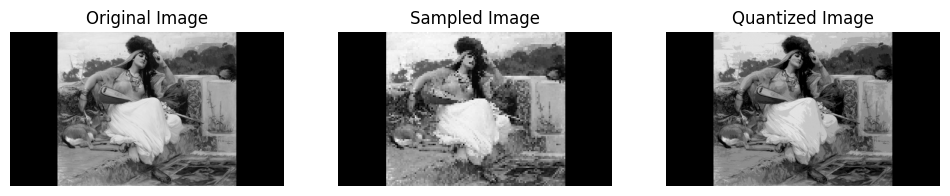

In [5]:
image1_path = "/content/Young-Woman-On-A-Terrace2K.jpg"
image2_path = "/content/Still-Life-with-Grapes-1852-2k.jpg"

sampling_factor=14
quantization_levels=9

# Load image in grayscale
original_image = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    print(f"Error: Unable to load image at {image1_path}")

# Sample and quantize
sampled_image = sample_image(original_image, sampling_factor)
quantized_image = quantize_image(original_image,quantization_levels)

# Plot results
plot_images(original_image, sampled_image, quantized_image)

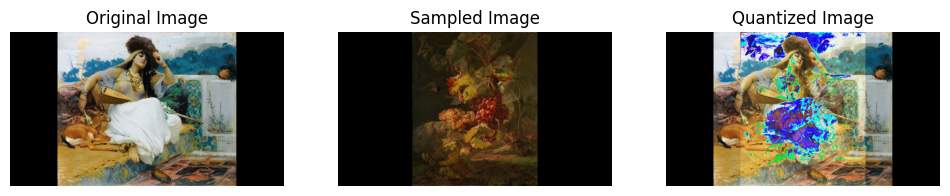

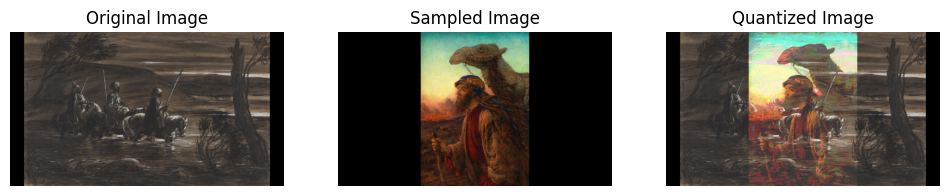

In [6]:
from PIL import Image
img1 = Image.open("/content/Young-Woman-On-A-Terrace2K.jpg")
img2 = Image.open("/content/Still-Life-with-Grapes-1852-2k.jpg")

#resize=(400,400)
#img1=img1.resize(resize,Image.Resampling.LANCZOS)
#img2=img2.resize(resize,Image.Resampling.LANCZOS)

im1arr=np.asarray(img1)
im2arr=np.asarray(img2)

addition=im1arr+im2arr
resultImage=Image.fromarray(addition)
resultImage.show()

#Sets and Logical Operations

img3=Image.open("/content/Three-Arab-Horsemen-Crossing-A-River2K.jpg")
img3.show()
img4=Image.open("/content/The-Homeward-Journey2K.jpg")
img4.show()

#resize=(400,400)
#img3=img3.resize(resize,Image.Resampling.LANCZOS)
#img4=img4.resize(resize,Image.Resampling.LANCZOS)

im3arr=np.asarray(img3)
im4arr=np.asarray(img4)

union=im4arr|im3arr
resultImage2=Image.fromarray(union)
resultImage2.show()


plot_images(img1,img2,resultImage)

plot_images(img3,img4,resultImage2)

## task 2.1 :
1. Subtract two images and display the result

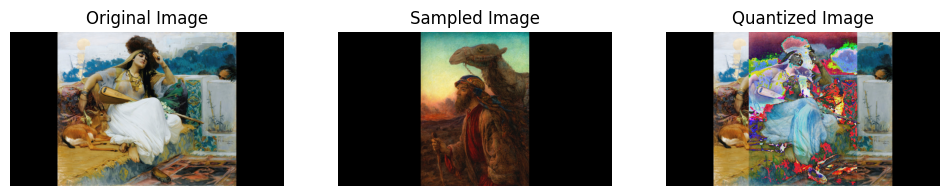

In [7]:
subtract = im1arr - im4arr
result1=Image.fromarray(subtract)

plot_images(img1,img4,result1)



## Task 2.2
2. Add one image with a constant value of 175 and display it.

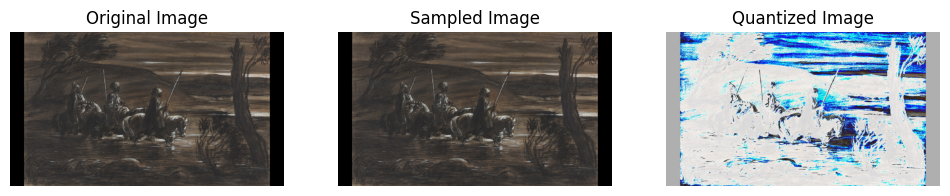

In [8]:
add175 = im3arr +175
result2=Image.fromarray(add175)

plot_images(img3,img3,result2)

## Task 2.3
3. Apply the set difference operation on two Gray-Scale images.  

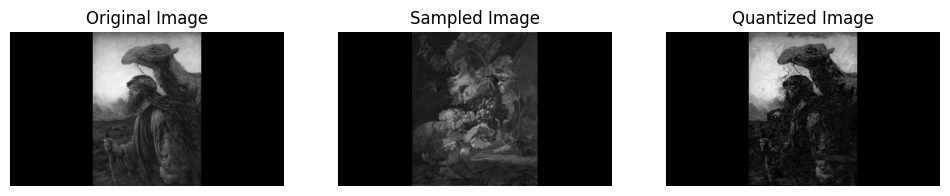

In [16]:
img4_gray = img4.convert('L')
img2_gray = img2.convert('L')
im4arr_gray=np.asarray(img4_gray)
im2arr_gray=np.asarray(img2_gray)

# Set Difference: A - B = A AND (NOT B)
not_img2 = ~im2arr_gray                          # NOT B
set_diff = im4arr_gray & not_img2                # A AND (NOT B)


result3 = Image.fromarray(set_diff)

plot_images(img4_gray,img2_gray,result3)


## Task 2.4
4. Apply the symmetric difference operation on two Gray-Scale images.

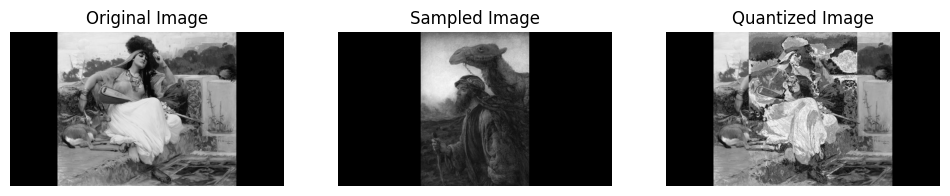

In [14]:
img1_gray = img1.convert('L')
img4_gray = img4.convert('L')
im1arr_gray = np.asarray(img1_gray)
im4arr_gray = np.asarray(img4_gray)

# Symmetric Difference: A XOR B
sym_diff = im1arr_gray ^ im4arr_gray              # XOR

# Ploting
result4 = Image.fromarray(sym_diff)
plot_images(img1_gray,img4_gray,result4)

## Task 2.5
5. Apply Intersection operations on two Gray-Scale images.  


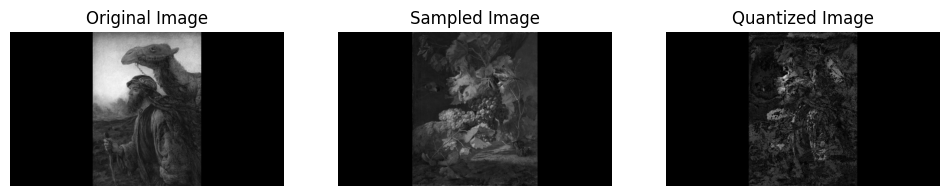

In [15]:
img4_gray = img4.convert('L')
img2_gray = img2.convert('L')
im4arr_gray = np.asarray(img4_gray)
im2arr_gray = np.asarray(img2_gray)

# Intersection: A AND B
intersection = im4arr_gray & im2arr_gray          # AND

# Ploting
result5 = Image.fromarray(intersection)
plot_images(img4_gray,img2_gray,result5)